<a href="https://colab.research.google.com/github/beatrice17-hub/Deep_Learning/blob/main/Beatrice_MNIST_fashion_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jumlah Class 10
Nama Class setelah di encoding {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Jumlah data train 60000
[9 0 0 ... 3 0 5]
Jumlah data test 10000
[9 2 1 ... 8 1 5]
28


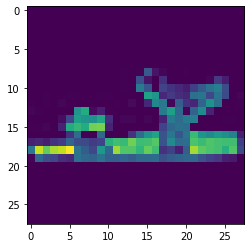

In [ ]:
# image recognition menggunakan convolutional neural network
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import AveragePooling2D #new
from tensorflow.keras.layers import BatchNormalization #new
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam


fashion_mnist=tf.keras.datasets.fashion_mnist
(train_X,train_y),(test_X,test_y)=fashion_mnist.load_data()
# from collections import Counter
print("Jumlah Class",len(set(train_y)))
print("Nama Class setelah di encoding",set(train_y))
          
print("Jumlah data train",len(train_y))
print(train_y)
          
print("Jumlah data test",len(test_y))
print(test_y)

print(len(train_X[-1]))
plt.imshow(train_X[-1])

In [ ]:

train_label=tf.keras.utils.to_categorical(train_y,num_classes=10)
test_label=tf.keras.utils.to_categorical(test_y,num_classes=10)
print(train_label)

train_data=tf.expand_dims(train_X,-1)
test_data=tf.expand_dims(test_X,-1)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
train_input=tf.data.Dataset.from_tensor_slices((train_data,train_label)).batch(50)
test_input=tf.data.Dataset.from_tensor_slices((test_data,test_label)).batch(50)

In [ ]:
input_data=tf.keras.layers.Input([28,28,1])

In [ ]:
model = Sequential()
model.add(Conv2D(8, (3, 3), padding="same", input_shape=(28, 28, 1)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1)))

model.add(Conv2D(16, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(3, 3), strides=(2, 2)))

model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(4, 4), strides=(3, 3)))

model.add(Flatten())
model.add(Dense(10))
model.add(Activation("softmax"))
model.summary()
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         80        
_________________________________________________________________
activation (Activation)      (None, 28, 28, 8)         0         
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 28, 28, 8)         32        
_________________________________________________________________
average_pooling2d (AveragePo (None, 27, 27, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 16)        1168      
_________________________________________________________________
activation_1 (Activation)    (None, 27, 27, 16)        0         
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 27, 27, 16)        6

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.fit(train_input,epochs=10)
model.evaluate(test_input)

Epoch 1/10
1200/1200 [==============================] - 19s 3ms/step - loss: 0.5839 - accuracy: 0.7920
Epoch 2/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2936 - accuracy: 0.8939
Epoch 3/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2572 - accuracy: 0.9071
Epoch 4/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2387 - accuracy: 0.9136
Epoch 5/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2258 - accuracy: 0.9169
Epoch 6/10
1200/1200 [==============================] - 4s 4ms/step - loss: 0.2155 - accuracy: 0.9209
Epoch 7/10
1200/1200 [==============================] - 4s 4ms/step - loss: 0.2063 - accuracy: 0.9248
Epoch 8/10
1200/1200 [==============================] - 4s 4ms/step - loss: 0.1984 - accuracy: 0.9266
Epoch 9/10
1200/1200 [==============================] - 4s 4ms/step - loss: 0.1923 - accuracy: 0.9287
Epoch 10/10
200/200 [==============================] - 1s 2ms/step - loss: 0.2378

[0.23781552910804749, 0.916100025177002]